<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-и-задачи-проекта" data-toc-modified-id="Описание-и-задачи-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание и задачи проекта</a></span></li><li><span><a href="#Служебные-ячейки-с-импортом-библиотек,-глобальными-переменными-и-функциями" data-toc-modified-id="Служебные-ячейки-с-импортом-библиотек,-глобальными-переменными-и-функциями-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Служебные ячейки с импортом библиотек, глобальными переменными и функциями</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-датасета-с-целевым-признаком" data-toc-modified-id="Загрузка-датасета-с-целевым-признаком-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка датасета с целевым признаком</a></span></li><li><span><a href="#Оценка-значений-целевого-признака" data-toc-modified-id="Оценка-значений-целевого-признака-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Оценка значений целевого признака</a></span></li><li><span><a href="#Формирование-загрузчика-и-потока-для-загрузки-изображений" data-toc-modified-id="Формирование-загрузчика-и-потока-для-загрузки-изображений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Формирование загрузчика и потока для загрузки изображений</a></span></li><li><span><a href="#Визуальная-оценка-корректности-возраста-объектов-(для-возраста-=-1-год)" data-toc-modified-id="Визуальная-оценка-корректности-возраста-объектов-(для-возраста-=-1-год)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Визуальная оценка корректности возраста объектов (для возраста = 1 год)</a></span></li><li><span><a href="#Выводы-по-исследовательскому-анализу" data-toc-modified-id="Выводы-по-исследовательскому-анализу-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы по исследовательскому анализу</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Исходный-код-создания-и-обучения-модели" data-toc-modified-id="Исходный-код-создания-и-обучения-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исходный код создания и обучения модели</a></span></li><li><span><a href="#Лог-работы-кода" data-toc-modified-id="Лог-работы-кода-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Лог работы кода</a></span></li></ul></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li><li><span><a href="#Чек-лист" data-toc-modified-id="Чек-лист-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист</a></span></li></ul></div>

# Определение возраста покупателей

## Описание и задачи проекта

**Описание проекта**

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. 

Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. 

В вашем распоряжении набор фотографий людей с указанием возраста.

**Исходные данные**

В папке path содержится csv-файл `labels.csv` с двумя колонками `file_name` и `real_age` и папка с изображениями `/final_files`.

**План работы**

1. Проведение исследовательского анализа набора фотографий.
2. Подготовка данных к обучению.
3. Постройка и обучение свёрточной нейронной сети на датасете с фотографиями людей. 
4. Подбор параметров сети для получения значения MAE на тестовой выборке не больше 8.

## Служебные ячейки с импортом библиотек, глобальными переменными и функциями

In [1]:
# СЛУЖЕБНОЕ Импорт библиотек
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# СЛУЖЕБНОЕ Глобальные переменные
RANDOM_STATE = 3141592654

DATASET_PATH = '/datasets/faces/labels.csv'
DIR_PATH = '/datasets/faces/final_files/'

## Исследовательский анализ данных

### Загрузка датасета с целевым признаком

In [3]:
labels = pd.read_csv(DATASET_PATH)
labels.info()
labels.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


### Оценка значений целевого признака

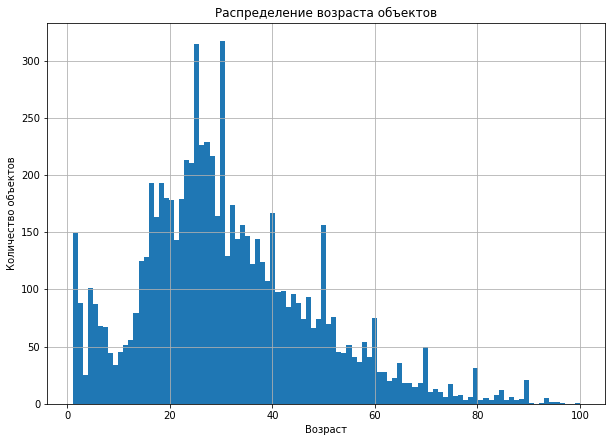

In [4]:
labels.hist(column='real_age', bins=100, figsize=(10,7));
plt.xlabel('Возраст')
plt.ylabel('Количество объектов')
plt.title('Распределение возраста объектов')
plt.show()

В диапазоне возрастов 0-5 лет выявлены выбросы, нехарактерные для возрастно-половой пирамиды, рассмотрим этот интервал подробнее.

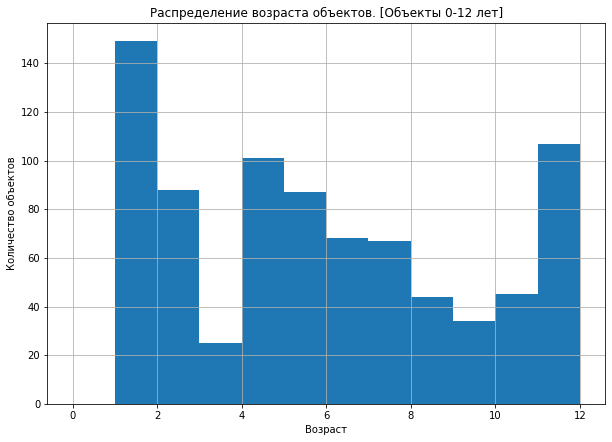

In [5]:
labels.hist(column='real_age', bins=12, figsize=(10,7), range=(0,12));
plt.xlabel('Возраст')
plt.ylabel('Количество объектов')
plt.title('Распределение возраста объектов. [Объекты 0-12 лет]')
plt.show()

Для проверки корректности данных в выбросах:
- При формировании загрузчика и просмотра изображений оценим соответствие изображений возрасту объекта для возраста = 1 год

### Формирование загрузчика и потока для загрузки изображений

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=DIR_PATH,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=RANDOM_STATE)

In [ ]:
features, target = next(train_gen_flow)

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.text(180, 200, target[i], size=20, backgroundcolor='y')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()


Выборка из 16 случайных изображений объектов и их возраста (цифры на желтом фоне)

### Визуальная оценка корректности возраста объектов (для возраста = 1 год)

In [ ]:
train_datagen_baby = ImageDataGenerator(rescale=1./255)
train_gen_flow_baby = train_datagen.flow_from_dataframe(
        dataframe=labels[labels['real_age'] == 1],
        directory=DIR_PATH,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=50,
        class_mode='raw',
        seed=RANDOM_STATE)

In [ ]:
features_baby, target_baby = next(train_gen_flow_baby)

Для визуального определения корректности маркировки целевого признака в выборке, выведем изображения случайных 50 объектов с возрастом = 1 год.

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(50):
    fig.add_subplot(10, 5, i+1)
    plt.imshow(features_baby[i])
    plt.text(180, 200, target_baby[i], size=20, backgroundcolor='y')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

### Выводы по исследовательскому анализу

 - В обучающем наборе 7591 объект
 - пропуски отстутствуют
 - возраст покупателей распределен непрерывно нормально
 - выбросы обнаружены для значений целевого признака (возраст): 1 год
 - исследованием определено, что аномалия в количестве изображений объектов с возрастом 1 год является особенностью обучающей выборки: объектам с целевым признаком (возраст) = 1 год действительно соответствуют корректные изображения объектов.

## Обучение модели

### Исходный код создания и обучения модели

Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке

```python
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

import pandas as pd

RANDOM_STATE = 3141592654

def load_train(path):

    labels = pd.read_csv(path + 'labels.csv')
    
    train_datagen = ImageDataGenerator(validation_split=0.1,
                            horizontal_flip=True, vertical_flip=True,
                            rotation_range=45, 
                            width_shift_range=0.2, height_shift_range=0.2,
                            rescale=1./255)

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=RANDOM_STATE)
       
    return train_datagen_flow
    
def load_test(path):

    labels = pd.read_csv(path + 'labels.csv')
                            
    test_datagen = ImageDataGenerator(validation_split=0.1,
                            rescale=1./255)

    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=RANDOM_STATE)
       
    return test_datagen_flow
	
def create_model(input_shape):

    # объявляем ResNet50, загрузка весов с сервера
    backbone = ResNet50(input_shape=input_shape,
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False) 
                    
    model = Sequential()
    
    # слои 

    model.add(backbone)
    model.add(GlobalMaxPooling2D())
    model.add(Dense(100, activation='linear')) 
 
    # конец слоев
    
    model.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['mae']) 

    return model
	
def train_model(model, train_data, test_data, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):

    model.fit(train_data, 
              validation_data=test_data,
              steps_per_epoch=steps_per_epoch,
              batch_size=batch_size,
              validation_steps=validation_steps,
              verbose=2, epochs=epochs)

    return model
```

### Лог работы кода

```
Using TensorFlow backend.
Found 6832 validated image filenames.
Found 759 validated image filenames.
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 427 steps, validate for 48 steps
Epoch 1/5
2023-01-04 22:59:20.313661: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-01-04 22:59:20.615420: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
427/427 - 60s - loss: 182.3533 - mae: 9.9116 - val_loss: 435.1362 - val_mae: 15.8660
Epoch 2/5
427/427 - 39s - loss: 65.5817 - mae: 6.2329 - val_loss: 94.4097 - val_mae: 7.3885
Epoch 3/5
427/427 - 39s - loss: 32.1017 - mae: 4.3987 - val_loss: 80.5998 - val_mae: 6.6631
Epoch 4/5
427/427 - 38s - loss: 20.9862 - mae: 3.5476 - val_loss: 93.1479 - val_mae: 7.5996
Epoch 5/5
427/427 - 38s - loss: 15.7553 - mae: 3.0222 - val_loss: 67.1211 - val_mae: 6.3115
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
48/48 - 4s - loss: 67.1211 - mae: 6.3115
Test MAE: 6.3115
```

## Анализ обученной модели

**Описание проекта**

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. 

Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. 

В вашем распоряжении набор фотографий людей с указанием возраста.
Значение MAE на тестовой выборке не должно быть больше 8.

**Выводы по исследовательскому анализу данных**

 - В обучающем наборе 7591 объект
 - пропуски отстутствуют
 - возраст покупателей распределен непрерывно нормально
 - выбросы обнаружены для значений целевого признака (возраст): 1 год
 - исследованием определено, что аномалия в количестве изображений объектов с возрастом 1 год является особенностью обучающей выборки: объектам с целевым признаком (возраст) = 1 год действительно соответствуют корректные изображения объектов.
 
 
 **Выводы по результатам обучения модели**
 
 *Предобработка/аугментация данных в выборке*
 - предоставленная выборка была разделена на тренировочную и тестовую в пропорции 9:1
 - для задач аугментации, т.е. увеличения выборки на основе имеющихся данных были применены горизонтальные и вертикальные отражения изображений, повороты до 90 град, растяжения и сжатия ширины и высоты изображений.
 - яркость изображений приведена к стандартному диапазону 0..1 
 
 
 *Исследованием принята для задач регрессии следующая модель:*
 
 - ResNet50, обученный на ImageNet c исключенным финальными пулингом GlobalAveragePooling2D и полносвязным слоем Dense
 - пулинг GlobalMaxPooling2D, обученный на предоставленной выборке
 - полносвязный слой Dense с кол-вом нейронов = 100, обученный на предоставленной выборке
 - функция потерь для задач регрессии принята MSE
 - активация последнего слоя сети производилось линейной функцией linear
 - обучение на 5 эпохах методом градиентного спуска с learning rate = 1e-3 


 *Результаты обучения моделей.*
 
 - значение метрики модели на тестовой выборке **MAE = 6.31**
 - полученное **значение MAE соответствует условиям ТЗ** и может быть уменьшено при дальнейшей работе над моделью.

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы